# DAT210x - Programming with Python for DS

## Module5- Lab5

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot') # Look Pretty

### A Convenience Function

In [3]:
def plotDecisionBoundary(model, X, y):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    padding = 0.6
    resolution = 0.0025
    colors = ['royalblue','forestgreen','ghostwhite']

    # Calculate the boundaris
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    x_range = x_max - x_min
    y_range = y_max - y_min
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    # Create a 2D Grid Matrix. The values stored in the matrix
    # are the predictions of the class at at said location
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))

    # What class does the classifier say?
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour map
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.terrain)

    # Plot the test original points as well...
    for label in range(len(np.unique(y))):
        indices = np.where(y == label)
        plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], label=str(label), alpha=0.8)

    p = model.get_params()
    plt.axis('tight')
    plt.title('K = ' + str(p['n_neighbors']))

### The Assignment

Load up the dataset into a variable called `X`. Check `.head` and `dtypes` to make sure you're loading your data properly--don't fail on the 1st step!

In [41]:
# .. your code here ..
X = pd.read_csv('Datasets/wheat.data')
X.head()

,id,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
0,0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama
3,3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,kama
4,4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,kama


Copy the `wheat_type` series slice out of `X`, and into a series called `y`. Then drop the original `wheat_type` column from the `X`:

In [42]:
# .. your code here ..
y = X.loc[:,'wheat_type']
X = X.drop('wheat_type', axis = 1)
X

,id,area,perimeter,compactness,length,width,asymmetry,groove
0,0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...,...
205,205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [6]:
y

0          kama
1          kama
2          kama
3          kama
4          kama
         ...   
205    canadian
206    canadian
207    canadian
208    canadian
209    canadian
Name: wheat_type, Length: 210, dtype: object

Do a quick, "ordinal" conversion of `y`. In actuality our classification isn't ordinal, but just as an experiment...

In [43]:
# .. your code here ..
y = y.astype('category')


In [8]:
y

0          kama
1          kama
2          kama
3          kama
4          kama
         ...   
205    canadian
206    canadian
207    canadian
208    canadian
209    canadian
Name: wheat_type, Length: 210, dtype: category
Categories (3, object): [canadian, kama, rosa]

Do some basic nan munging. Fill each row's nans with the mean of the feature:

In [44]:
# .. your code here ..
X = X.fillna(X.mean())

In [45]:
X

,id,area,perimeter,compactness,length,width,asymmetry,groove
0,0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...,...
205,205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


Split `X` into training and testing data sets using `train_test_split()`. Use `0.33` test size, and use `random_state=1`. This is important so that your answers are verifiable. In the real world, you wouldn't specify a random_state:

In [46]:
# .. your code here ..
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=1, stratify=y)

In [12]:
X_train

,id,area,perimeter,compactness,length,width,asymmetry,groove
122,122,16.17,15.38,0.8588,5.762,3.387,4.286,5.703
37,37,17.08,15.38,0.9079,5.832,3.683,2.956,5.484
6,6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219
104,104,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
134,134,15.56,14.89,0.8823,5.776,3.408,4.972,5.847
...,...,...,...,...,...,...,...,...
39,39,14.28,14.17,0.8944,5.397,3.298,6.685,5.001
172,172,11.27,12.97,0.8419,5.088,2.763,4.309,5.000
68,68,14.37,14.39,0.8726,5.569,3.153,1.464,5.300
23,23,12.08,13.23,0.8664,5.099,2.936,1.415,4.961


Create an instance of SKLearn's Normalizer class and then train it using its .fit() method against your _training_ data. The reason you only fit against your training data is because in a real-world situation, you'll only have your training data to train with! In this lab setting, you have both train+test data; but in the wild, you'll only have your training data, and then unlabeled data you want to apply your models to.

In [47]:
# .. your code here ..
from sklearn.preprocessing import Normalizer
normalizer = Normalizer().fit(X_train)
normalizer

Normalizer(copy=True, norm='l2')

With your trained pre-processor, transform both your training AND testing data. Any testing data has to be transformed with your preprocessor that has ben fit against your training data, so that it exist in the same feature-space as the original data used to train your models.

In [48]:
# .. your code here ..
X_train = normalizer.transform(X_train)
X_test = normalizer.transform(X_test)


In [15]:
X_test

array([[ 0.83668524,  0.35343613,  0.35926757,  0.02212906,  0.14160264,
         0.07986541,  0.0538521 ,  0.12707474],
       [ 0.59148456,  0.51717931,  0.51126447,  0.03394752,  0.18923809,
         0.12506202,  0.19348939,  0.17674298],
       [ 0.94784901,  0.19889784,  0.20822588,  0.01305925,  0.08116897,
         0.04618883,  0.06254299,  0.07655009],
       [ 0.90560172,  0.27903853,  0.27394452,  0.01663854,  0.10461587,
         0.06209032,  0.05101556,  0.09642772],
       [ 0.94825091,  0.2120289 ,  0.19748906,  0.01092132,  0.07493711,
         0.04346782,  0.06220526,  0.07326819],
       [ 0.80509877,  0.37339926,  0.38922361,  0.02388645,  0.15313534,
         0.08509061,  0.09802772,  0.14150305],
       [ 0.99412147,  0.06312137,  0.07188674,  0.00438162,  0.02893107,
         0.01451631,  0.02617853,  0.02860504],
       [ 0.98506179,  0.11501837,  0.10757725,  0.0062718 ,  0.04161355,
         0.02460528,  0.02671006,  0.04196788],
       [ 0.830978  ,  0.3739401 

Just like your preprocessing transformation, create a PCA transformation as well. Fit it against your training data, and then project your training and testing features into PCA space using the PCA model's `.transform()` method. This has to be done because the only way to visualize the decision boundary in 2D would be if your KNN algo ran in 2D as well:

In [16]:
# .. your code here ..
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, svd_solver = 'full')
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [17]:
T_train = pca.transform(X_train)
T_test = pca.transform(X_test)

In [24]:
X_train.shape

(140, 8)

Create and train a KNeighborsClassifier. Start with `K=9` neighbors. Be sure train your classifier against the pre-processed, PCA- transformed training data above! You do not, of course, need to transform your labels.

In [51]:
# .. your code here ..
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,Y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

ValueError: query data dimension must match training data dimension

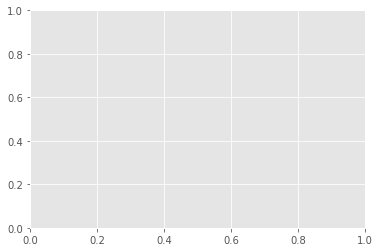

In [22]:
# I hope your KNeighbors classifier model from earlier was named 'knn'
# If not, adjust the following line:
plotDecisionBoundary(knn, X_train, Y_train)

In [38]:
Y_train.shape

(140,)

Display the accuracy score of your test data/labels, computed by your KNeighbors model. You do NOT have to run `.predict` before calling `.score`, since `.score` will take care of running your predictions for you automatically.

In [50]:
knn.predict(X_test)

array(['kama', 'kama', 'rosa', 'kama', 'rosa', 'kama', 'canadian', 'rosa',
       'kama', 'rosa', 'canadian', 'rosa', 'kama', 'rosa', 'canadian',
       'canadian', 'rosa', 'canadian', 'rosa', 'canadian', 'canadian',
       'canadian', 'canadian', 'rosa', 'kama', 'kama', 'canadian', 'kama',
       'rosa', 'rosa', 'canadian', 'kama', 'rosa', 'canadian', 'kama',
       'rosa', 'kama', 'rosa', 'canadian', 'rosa', 'kama', 'kama', 'rosa',
       'rosa', 'kama', 'canadian', 'rosa', 'rosa', 'canadian', 'rosa',
       'canadian', 'canadian', 'kama', 'kama', 'canadian', 'kama',
       'canadian', 'rosa', 'rosa', 'kama', 'rosa', 'kama', 'rosa', 'rosa',
       'canadian', 'canadian', 'kama', 'canadian', 'rosa', 'rosa'], dtype=object)

In [40]:
knn.score(X_test, Y_test)

0.90000000000000002

### Bonus

Instead of the ordinal conversion, try and get this assignment working with a proper Pandas get_dummies for feature encoding. You might have to update some of the `plotDecisionBoundary()` code.

In [ ]:
plt.show()